In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy import stats

In [10]:
# Sentetik dataset oluşturuluyor
ornek_sayısı = 41

X = np.linspace(300,500,ornek_sayısı) # Sentetik X oluşturuldu
y = np.linspace(1000,2000,ornek_sayısı) + np.random.randint(100,500,ornek_sayısı) # Sentetik y oluşturuldu

In [11]:
X

array([300., 305., 310., 315., 320., 325., 330., 335., 340., 345., 350.,
       355., 360., 365., 370., 375., 380., 385., 390., 395., 400., 405.,
       410., 415., 420., 425., 430., 435., 440., 445., 450., 455., 460.,
       465., 470., 475., 480., 485., 490., 495., 500.])

In [12]:
X.shape

(41,)

In [13]:
df = pd.DataFrame()
df["X"] = X
df["y"] = y
df.head()

,X,y
0,300.0,1190.0
1,305.0,1372.0
2,310.0,1463.0
3,315.0,1533.0
4,320.0,1407.0


<AxesSubplot:>

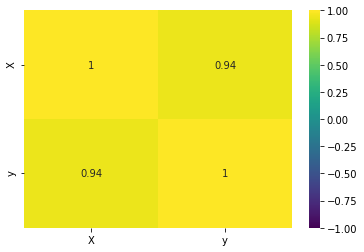

In [14]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="viridis")

In [15]:
model = LinearRegression().fit(X.reshape(-1,1), y.reshape(-1,1))

In [16]:
model.intercept_ # model intercept değeri bulundu

array([-105.78397213])

In [17]:
model.coef_ # model katsayı değeri bulundu

array([[4.82080139]])

In [33]:
y_pred = model.intercept_ + (model.coef_ * 200)  # 200 değeri için model tahminde bulunuyor.
y_pred

array([[858.37630662]])

In [29]:
# farklı değerler için model tahminde bulunuyor ve sonuçları gösteriyor.

liste= [100,200,300,400,500]
tahminlerim = {}

for i in liste:
    tahminlerim[f"{i}"] = model.intercept_ + (model.coef_ * i)
    
tahminlerim

{'100': array([[376.29616725]]),
 '200': array([[858.37630662]]),
 '300': array([[1340.45644599]]),
 '400': array([[1822.53658537]]),
 '500': array([[2304.61672474]])}

In [34]:
X1 = np.array([200]).reshape(-1,1)
y1 = model.predict(X1)
y1  # sonucun yukarıdakiler ile aynı olduğu görüldü.

array([[858.37630662]])

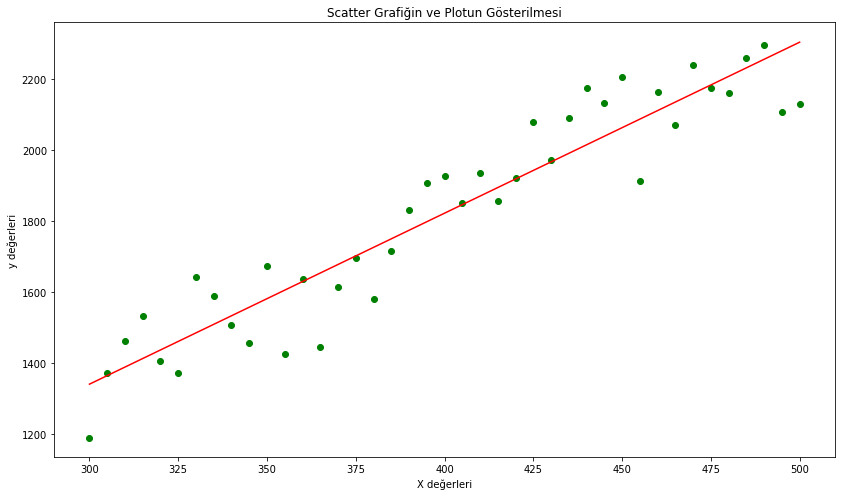

In [38]:
katsayı, intercept, _, _, _ = stats.linregress(X,y)

def plotum(X):
    return intercept + katsayı * X

ciz = plotum(X)

#plot line # RSS
plt.figure(figsize=(14,8))
plt.title("Scatter Grafiğin ve Plotun Gösterilmesi")
plt.xlabel("X değerleri")
plt.ylabel("y değerleri")
plt.scatter(X,y, c = 'g')
plt.plot(X,ciz, c = 'r')
plt.show()

In [42]:
def scores(X, y):
  print('The R_2 value is: ', r2_score(y, plotum(X)))
  print('The MAE value is: ', mean_absolute_error(y, plotum(X)))
  print('The MSE value is: ', mean_squared_error(y, plotum(X)))
  print('The MAPE value is: ', mean_absolute_percentage_error(y, plotum(X)))

In [43]:
scores(X,y)

The R_2 value is:  0.8860303319178752
The MAE value is:  83.78119316733236
The MSE value is:  10462.782999065173
The MAPE value is:  0.04796551693674242
